In [37]:

#

In [38]:
# 설명 가능한 딥러닝

!pip install tf_explain

In [39]:
!pip install opencv-python

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오는 부분(폐쇄성 민감도 방식)
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

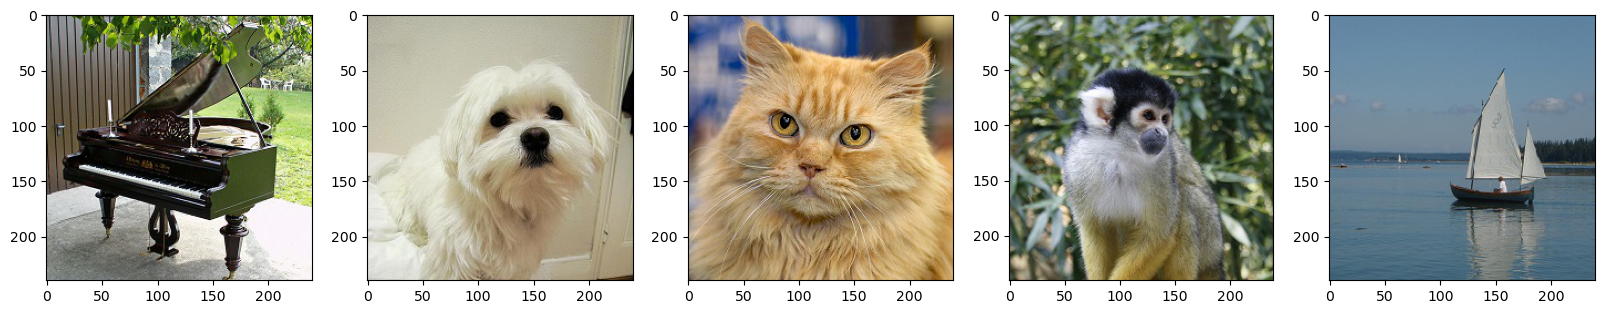

In [41]:
# 이미지 경로 확인
# C:\Users\SBAuser\Desktop\code\class\deep learning\data\img

# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 이미지를 불러서 리스트에 담기
for img in glob.glob('./data/img/*_0.jpg'): #0으로 시작하는 애들 jpg 가져오기
    images_originals.append(mpimg.imread(img))
    
# 이미지 크기
plt.figure(figsize=(20,20))

for i, image_o in enumerate(images_originals):
    plt.subplot(5,5, i+1)
    plt.imshow(image_o)


In [42]:
# 사전에 학습된 딥러닝 모델 불러오기 

model = VGG16(weights='imagenet', include_top=True)

In [43]:
# 원본 이미지 이름과 imagenet 에서 해당 이미지 인덱스 

input_list = ['persian_cat','squirrel_monkey','grand_piano','yawl','maltese']
imagenet_index = ['283','382','579','914','153']

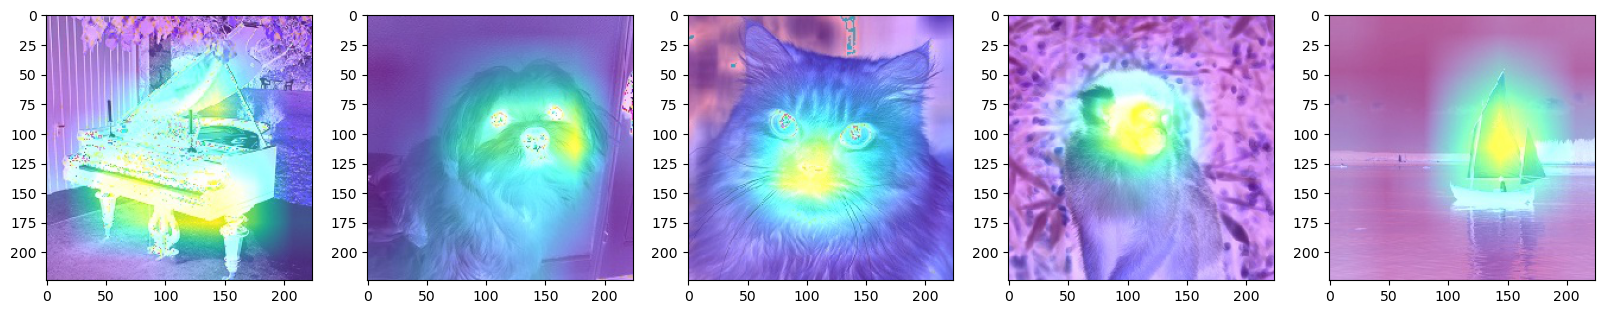

In [44]:
# gradient CAM 선택

explainer = GradCAM()

# gradient CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 생성 
images_cams = []

# gradient CAM 알고리즘 실행

for l,i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224,224))
    # 이미지를 불러와서 내부에서 처리될 이미지 크기 설정 
    img = img_to_array(img)
    # 이미지를 넘파이 배열로 변환 
    data = ([img],None)
    grid = explainer.explain(data,model,int(i))
    # data,model,int(i)(데이터, 모델,클래스)
    explainer.save(grid,'.','./data/img/{}_cam.jpg'.format(l))
    # 실행후 저장되는 이름 
    # save(output,저장될 폴더, 저장될 이름)
    
# gradient CAM 알고리즘 적용된 이미지 불러오는 부분 
plt.figure(figsize=(20,20))
    
for img in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img))

for i, image_c in enumerate(images_cams):
    plt.subplot(5,5,i+1)
    plt.imshow(image_c)
    
    # print(data)

In [45]:
# 오클루전 알고리즘

explainer = OcclusionSensitivity()

# 알고리즘 적용된 이미지가 들어갈 빈 리스트 생성
images_occls = []

# 패치크기 설정이 추가됨(patch_size 정함)
# patch_size : 사진을 가리며 움직이는 검은색 사각형의 크기 (일종의 mask)
# patch_size 크게 잡으면 >> 조금 더 넓은 범위의 결과가 나온다. 
# patch_size 작게 잡으면 >> 조금 더 세밀한 부분을 가리키는 결과가 나온다. 

In [46]:
# patch_size = 40
patch_size = 20 

In [47]:
# 오클루전 알고리즘 실행

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224,224))
    # 이미지를 불러와서 내부에서 처리될 이미지 크기 설정 
    img = img_to_array(img)
    # 이미지를 넘파이 배열로 변환 
    data = ([img],None)
    
    occls = explainer.explain(data,model,int(i),patch_size)
    # data,model,int(i)(데이터, 모델,클래스)
    explainer.save(occls,'.','./data/img/{}_occls.jpg'.format(l))
    # 실행 후 저장되는 이름 

5/5 [==============================] - 7s 1s/step


In [48]:
# 오클루전 알고리즘이 적용된 이미지 불러오기 

plt. figure(figsize=(20,20))

for img in glob.glob('./data/img/*_occl.jpg'):
    images_occls.append(mpimg.imread(img))
    
for i, image in enumerate(images_occls):
    plt.subplot(5,5,i+1)
    plt.imshow(image)

<Figure size 2000x2000 with 0 Axes>